<a href="https://colab.research.google.com/github/mithun-mith/Assignment--Product-Dissection/blob/main/Capstone_Project_Capstone_End_to_End_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Guidelines**


##Capstone Project  - End to End Machine Learning

Contribution - Individual

Team Member 1 - Mithun Waghmare

Github Link -

###About Project

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

##Problem Statement:

Prob statement
Business context
Data understanding
Dataset loading and Cleanup
EDA
Feature Engineering: Encoding, Feature Creation, Multicolinearty handling.
Target Feature conditioning.
Model Implementation: Train test split, model fitting, testing, evaluation, regularisation etc.
Model Explainability: Feature Importance.
Conclusion.
Github Commits at regular intervals.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# CSV file is named 'house_data.csv'
file_path = '/content/drive/MyDrive/data_YesBank_StockPrices (1).csv'  # Change the file path accordingly

# Load the data into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data loading
data.head()


,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [13]:
data.shape

(185, 5)

In [14]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
data.describe()

In [8]:
data.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [15]:
null_values = data.isnull().sum()
print(null_values)

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


In [30]:
# Check for duplicate rows in the DataFrame
duplicate_rows = data.duplicated().sum()

# Display the count of duplicate rows
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


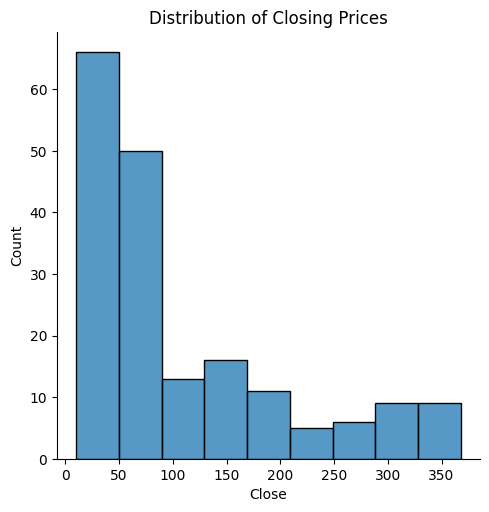

In [23]:
# Target variable
y = df['Close']

# Split data
X = df.drop(['Date','Close'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Distribution plot of closing prices
sns.displot(data['Close'])
plt.title("Distribution of Closing Prices")
plt.show()



<ipython-input-34-767b3143a4e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


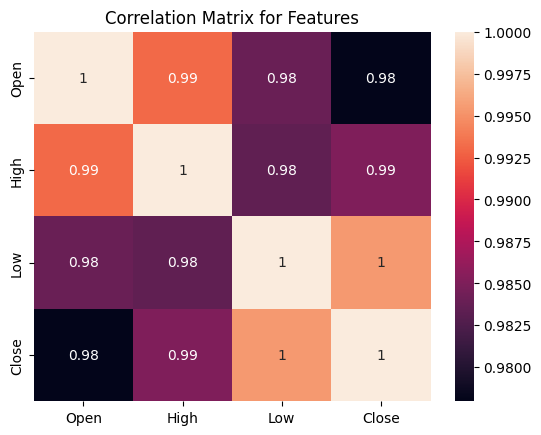

In [34]:
# Correlation matrix heatmap
corr_mat = data.corr()
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation Matrix for Features")
plt.show()

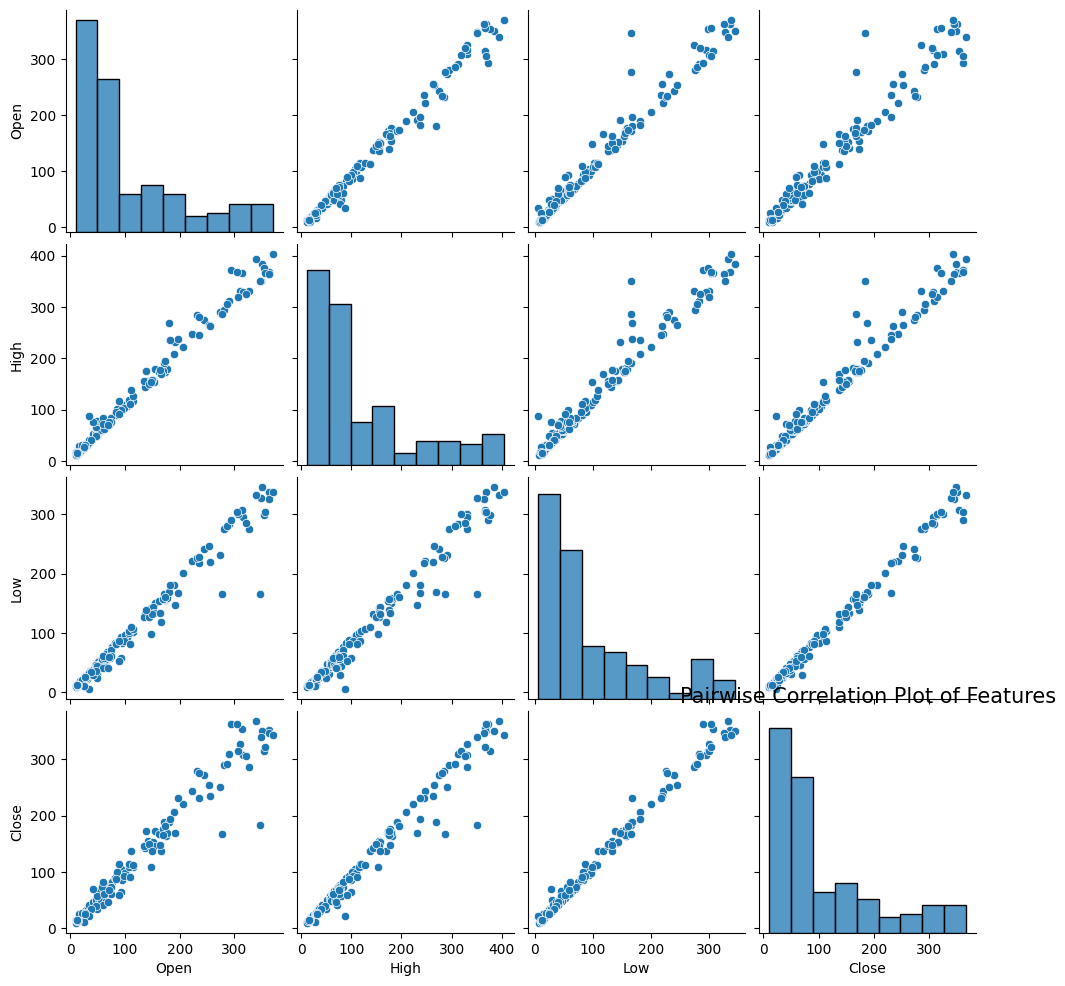

In [36]:
# Select columns for pairplot
cols = ['Open', 'High', 'Low', 'Close']

# Create pairplot
sns.pairplot(data[cols])

# Decorations
plt.xticks(rotation=90)
plt.title('Pairwise Correlation Plot of Features', fontsize=15)

plt.show()

In [39]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [58]:
x = data.iloc[:,[1,2,3]]

In [59]:
x

,Open,High,Low
0,13.00,14.00,11.25
1,12.58,14.88,12.55
2,13.48,14.87,12.27
3,13.20,14.47,12.40
4,13.35,13.88,12.88
...,...,...,...
180,25.60,28.30,11.10
181,12.00,17.16,11.85
182,14.30,15.34,12.75
183,13.30,14.01,12.11


In [60]:
y = data.iloc[:,[4]]
y

,Close
0,12.46
1,13.42
2,13.30
3,12.99
4,13.41
...,...
180,11.95
181,14.37
182,13.15
183,12.42


In [62]:
# Target variable
y = data['Close']

# Split data
X = data.drop(['Date','Close'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Modelling
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
# Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

RMSE: 9.30826467528386


Coefficients: [-0.50522745  0.53683265  1.00342375]


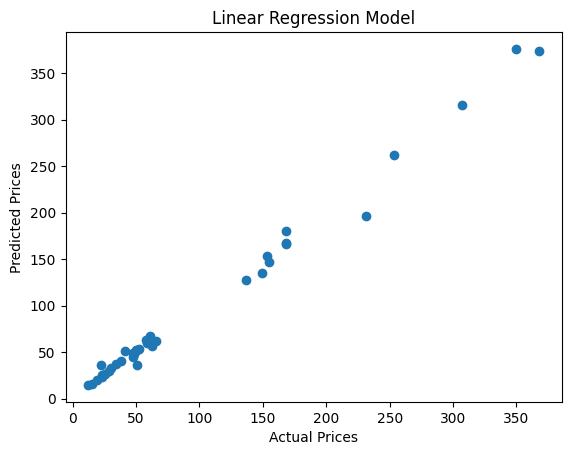

Model evaluation completed. Ready for recommendations.


In [67]:
# Feature Importance
print('Coefficients:', model.coef_)

# Plots
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Model')
plt.show()

print('Model evaluation completed. Ready for recommendations.')